<h1 line-height:0.7; ><center>Assignment 4</center></h1>
<h3><center>Julien Horwood</center></h3>
<h4><center>November 20th, 2018</center></h4>

## HMM implementation
### 1.
See asg4_module.py for definitions.

In [1]:
import asg4_module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%psource asg4_module
%reload_ext autoreload
%autoreload 2

### 2. Fake parameters inference
We first define the parameters we will be using according to the given values.

In [2]:
pi = np.array([1/4]*4).reshape(4,1)
A =  np.array([[1/2, 1/6,1/6,1/6],
               [1/6,1/2,1/6,1/6],
               [1/6,1/6,1/2,1/6],
               [1/6,1/6,1/6,1/2]])
mu_vec = np.array([[-2.0344,4.1726], [3.9779,3.7735], [3.8007,-3.7972], [-3.0620,-3.5345]]) 
sigma1 = [[2.9044, 0.2066], [0.2066, 2.7562]]
sigma2 = [[0.2104, 0.2904], [0.2904, 12.2392]]
sigma3 = [[0.9213, 0.0574], [0.0574, 1.8660]]
sigma4 = [[6.2414, 6.0502], [6.0502, 6.1825 ]]
sigma_vec = np.array([sigma1,sigma2,sigma3,sigma4])

Loading the data

In [3]:
test_data = np.loadtxt("Data/EMGaussian.test")
train_data = np.loadtxt("Data/EMGaussian.train")

Initialize an HMM class object with above parameters and compute alphas and betas for all t in test data (considering them sequentially).

In [4]:
hmm = asg4_module.HMM(transition_matrix = A, pi = pi, mu_vec = mu_vec, sigma_vec = sigma_vec)
alphas = hmm.alpha_rec(test_data)
betas = hmm.beta_rec(test_data)

We can go ahead and predict the smoothing distributions for t = 1,..,100. Note that in the call to the smoothing function we do not require the alphas and betas as arguments as these are saved as object attributes.

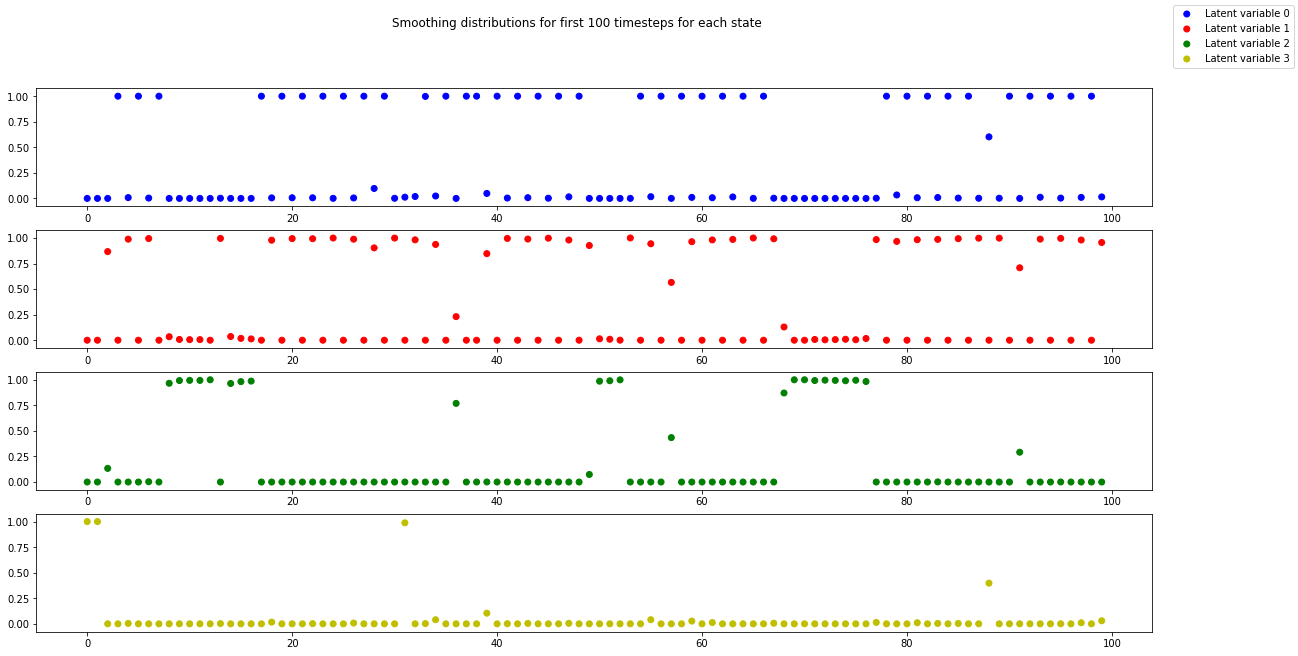

In [5]:
z_100 = []
for timestep in range(100):
    z_100.append(hmm.predict_smoothing(timestep))
z_100 = np.array(z_100)
fig,ax = plt.subplots(4,1, figsize=(20,10))
fig.suptitle('Smoothing distributions for first 100 timesteps for each state')
ax[0].scatter(range(100),z_100[:,0],c= ['b']*100)

ax[1].scatter(range(100),z_100[:,1],c= ['r']*100 )

ax[2].scatter(range(100),z_100[:,2] ,c=['g']*100)

ax[3].scatter(range(100),z_100[:,3],c=['y']*100 )
fig.legend(["Latent variable 0","Latent variable 1","Latent variable 2","Latent variable 3"])
fig.savefig("Figures/smoothingq2.png")

### 3. M-step update. See pdf.
### 4. EM implementation. See module.

In [6]:
train_likelihoods, test_likelihoods = hmm.fit(data = train_data, test_data = test_data)

We can plot the resulting clusterings to see if this makes sense.

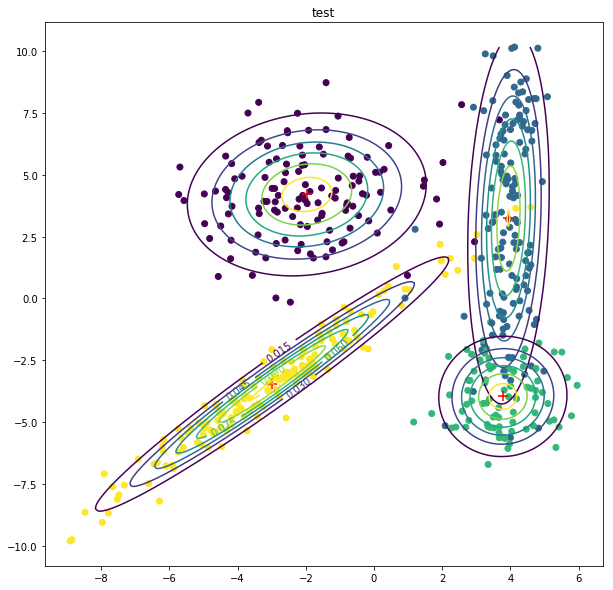

In [7]:
asg4_module.plot_hmm_clustering(train_data, np.argmax(hmm.tau,axis=1), model = hmm, title = 'test', figure_path='')

### 5. Log-likelihood plots.

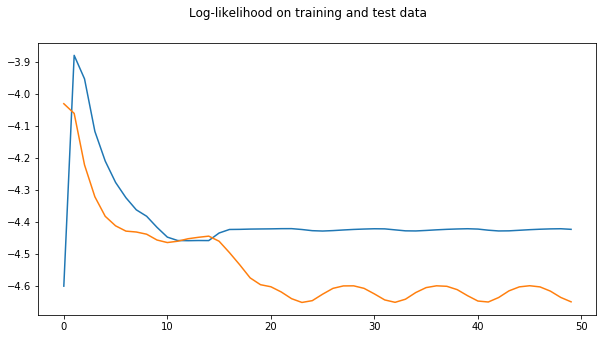

In [8]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Log-likelihood on training and test data')
plt.plot(range(len(train_likelihoods)), train_likelihoods)
plt.plot(range(len(test_likelihoods)), test_likelihoods)
plt.savefig('Figures/logq5.png')

### 6. Log-likelihood comparison.

In [9]:
likelihood_table = pd.DataFrame({"Training log-likelihood" : [train_likelihoods[-1],-4.741765665602915, -5.478460234659817],
"Testing log-likelihood" : [test_likelihoods[-1], -4.907123758599733 ,-5.437695077856566]},
index=['HMM','General GMM', 'Isotropic GMM'],)

In [10]:
likelihood_table

,Training log-likelihood,Testing log-likelihood
HMM,-4.422236,-4.648802
General GMM,-4.741766,-4.907124
Isotropic GMM,-5.478460,-5.437695


### 7. Viterbi pseudocode and description. See pdf.
### 8. Viterbi implementation. 

We obtain the following state assignment following a run of the Viterbi algorithm.

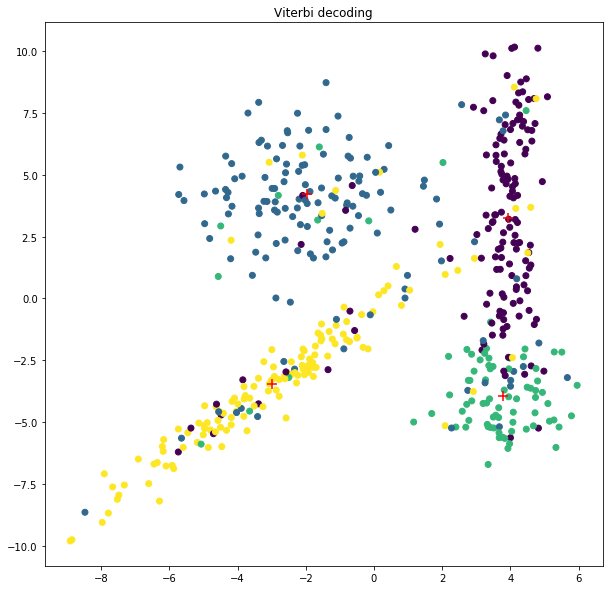

In [11]:
asg4_module.plot_hmm_clustering(train_data, hmm.viterbi_decoding(train_data), model = hmm,contours = False, title = 'Viterbi decoding', figure_path='Figures/viterbiq8.png')

### 9. Marginal state probabilities



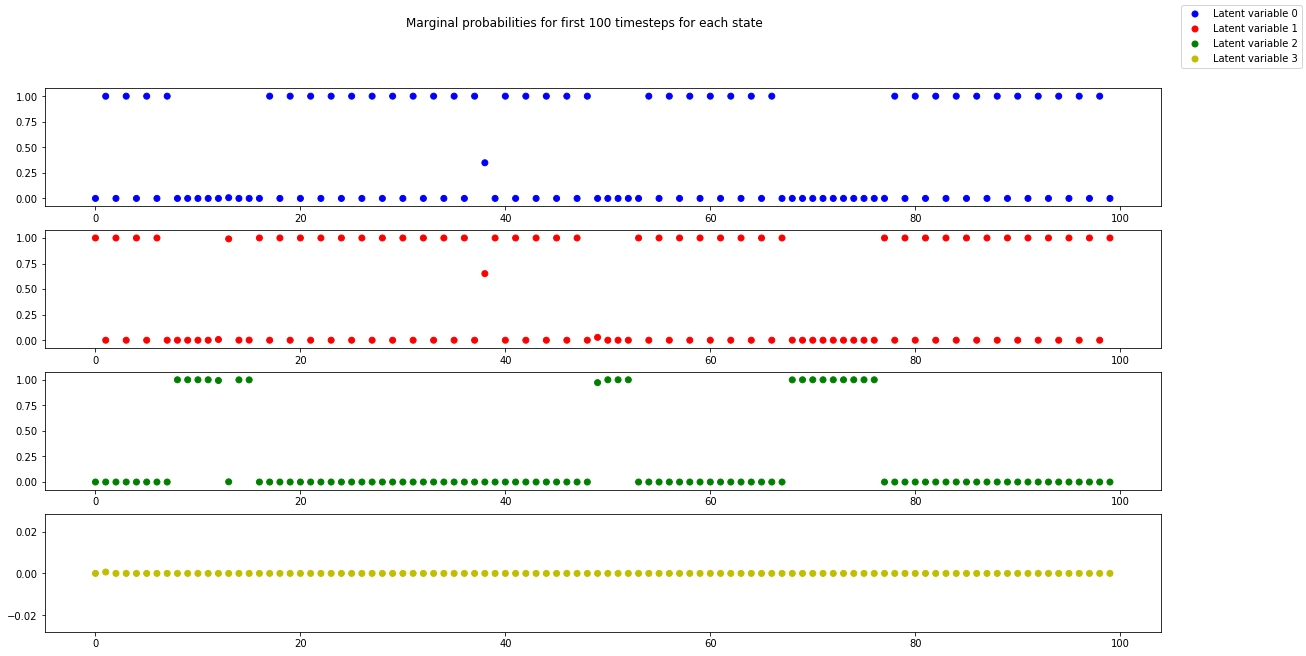

In [12]:
hmm.alpha_rec(test_data)
hmm.beta_rec(test_data)

z_100 = []
for timestep in range(100):
    z_100.append(hmm.predict_smoothing(timestep))
z_100 = np.array(z_100)
fig,ax = plt.subplots(4,1, figsize=(20,10))
fig.suptitle('Marginal probabilities for first 100 timesteps for each state')
ax[0].scatter(range(100),z_100[:,0],c= ['b']*100)

ax[1].scatter(range(100),z_100[:,1],c= ['r']*100 )

ax[2].scatter(range(100),z_100[:,2] ,c=['g']*100)

ax[3].scatter(range(100),z_100[:,3],c=['y']*100 )
fig.legend(["Latent variable 0","Latent variable 1","Latent variable 2","Latent variable 3"])
fig.savefig("Figures/smoothingq9.png")

### 10. Most likely states as a function of marginals



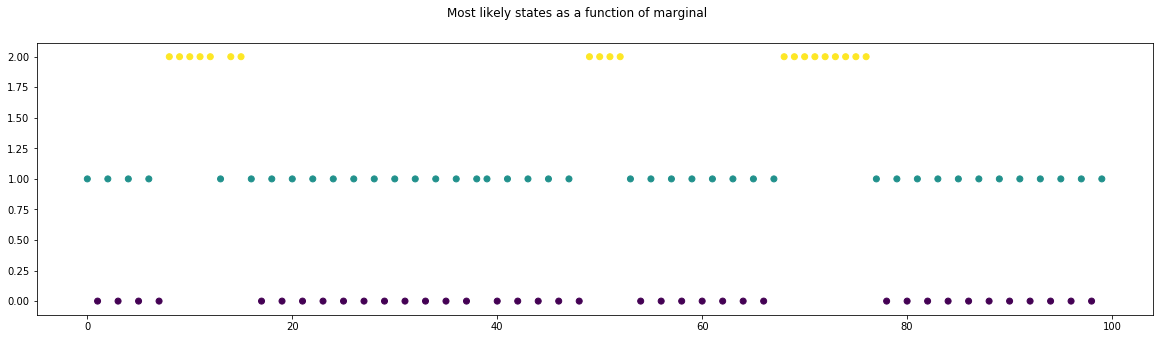

In [13]:
fig = plt.figure(figsize=(20,5))
plt.suptitle("Most likely states as a function of marginal")
states = [np.argmax(z_100[t,:]) for t in range(100)]
plt.scatter(range(100),states, c = states)
plt.show()
fig.savefig("Figures/statesmarginalsq10.png")

### 11. Most likely states in test data according to Viterbi

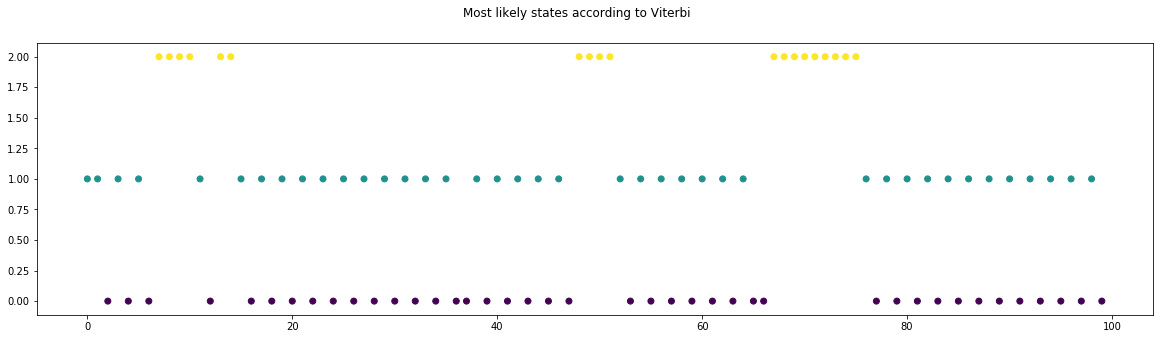

In [14]:
v_states = hmm.viterbi_decoding(test_data)
fig = plt.figure(figsize=(20,5))
plt.suptitle("Most likely states according to Viterbi")
plt.scatter(range(100),v_states[:100], c = v_states[:100])
plt.show()
fig.savefig("Figures/statesviterbiq10.png")

It turns out that the predicted states are very similar when looking at Viterbi or the marginal probabilities.

### 12. Choosing number of states

A first step in determining the number of states appropriate for an HMM model should always be knowledge of the underlying phenomenon. If this provides no hints as to a reasonable number of states for the model, one way to proceed might be to treat the number of states as a hyper-parameter to the model, and compute the resulting likelihood as a function of the number of states selected. Because the likelihood is likely to be overfit by increasing the number of states too much, one could choose the smallest number of states which falls within reasonable reach of the highest likelihood obtained, implemening a form of "early stopping" on this hyperparameter search.